# **LOGISITIC REGRESSION**

In [3]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
np.random.seed(40)
print('\n\t### Training Logistic Regression Classifier ### \n')
lr = LogisticRegression(solver='liblinear', class_weight='balanced')
lr_parameters = {
            'random_state': (0,10,20,30, 42),
        }




	### Training Logistic Regression Classifier ### 



#  **Random UnderSampling and OverSampling**   ###

In [4]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import pandas as pd

X = pd.read_csv('training_data.csv')
y = pd.read_csv('train_data_classlabels.csv')
counts_0 = {0: 12500, 1 : 104} 
counts_1= {0: 12500, 1: 2500}

pipeline = Pipeline([
    ('under_sampling', RandomUnderSampler(sampling_strategy=counts_0, random_state=40)),
    ('over_sampling', RandomOverSampler(sampling_strategy=counts_1, random_state=40))
])

X_random_selected, y_random_selected = pipeline.fit_resample(X, y)

# train_test_split

from sklearn.model_selection import train_test_split
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_random_selected, y_random_selected, test_size = 0.2, random_state = 40)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(lr, lr_parameters, scoring='f1_macro', cv = 5 )

# fitting the model for grid search
grid.fit(X_train_rs, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_rs)

# print classification report
print(classification_report(y_test_rs, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{'random_state': 0}
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2482
         1.0       0.92      0.97      0.95       518

    accuracy                           0.98      3000
   macro avg       0.96      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



# Feature selection ###

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.39345943 0.40595342 0.4133974  0.41993652 0.42804483 0.4111661
 0.41097549 0.41705765 0.40753769 0.42188698 0.43242856 0.43233017
 0.43722233 0.39009862 0.4372038  0.39830245 0.42379056 0.4349884
 0.42243    0.4021419  0.39676975 0.40796714 0.38946055 0.39142349
 0.38968641 0.39752409 0.39478889 0.40744114 0.39928144 0.32962099]



<Axes: >

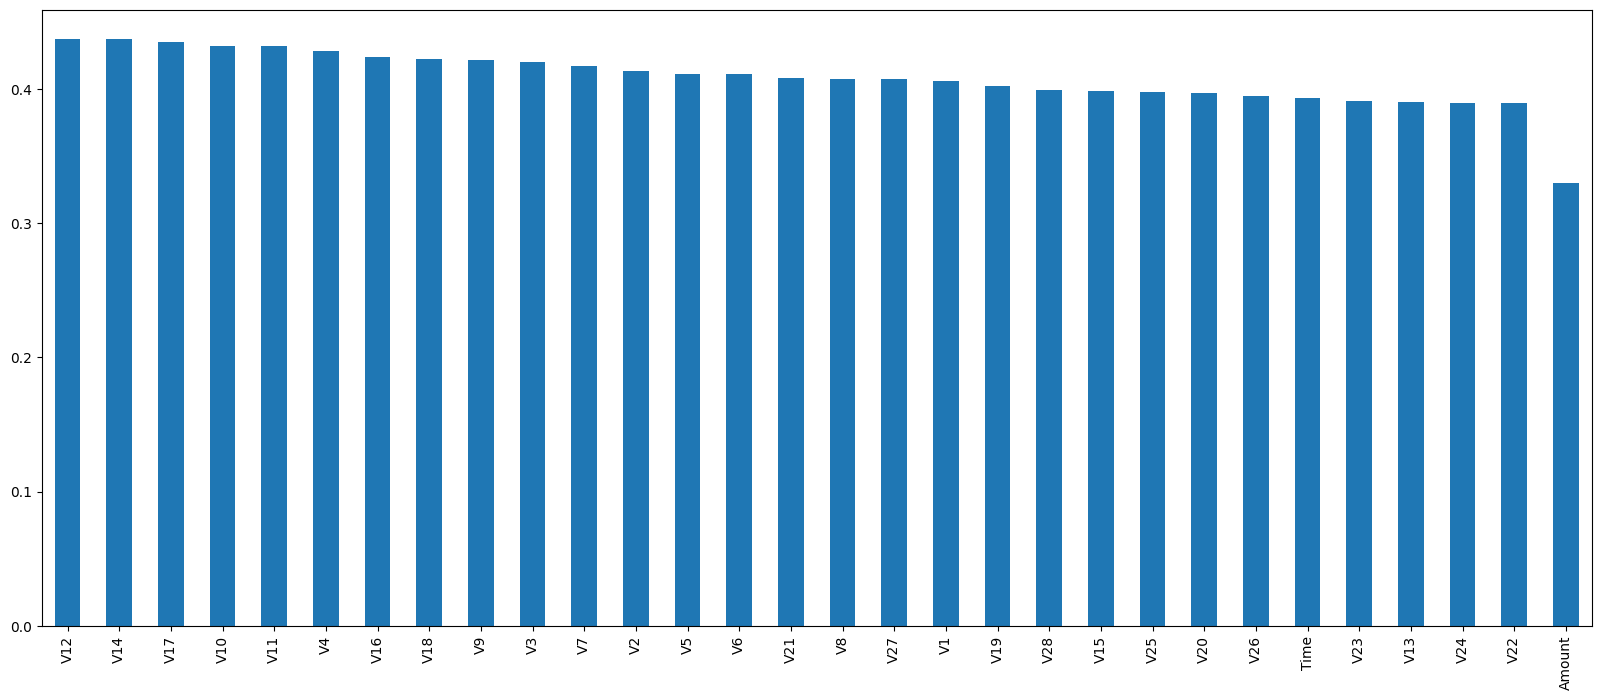

In [6]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_rs = mutual_info_classif(X_train_rs, y_train_rs)
print(m_rs)
print()

m_rs = pd.Series(m_rs)

m_rs.index = X_train_rs.columns
m_rs.sort_values(ascending= False)
m_rs.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting KBest

In [7]:
from sklearn.feature_selection import SelectKBest
k_best = 29
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_rs = mi_selector.fit_transform(X_train_rs, y_train_rs)
X_test_selected_rs = mi_selector.transform(X_test_rs)


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(lr, lr_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_rs, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_rs)

# print classification report
print(classification_report(y_test_rs, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{'random_state': 0}
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2482
         1.0       0.89      0.93      0.91       518

    accuracy                           0.97      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000



C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Feature Selection for Logistic Regression

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

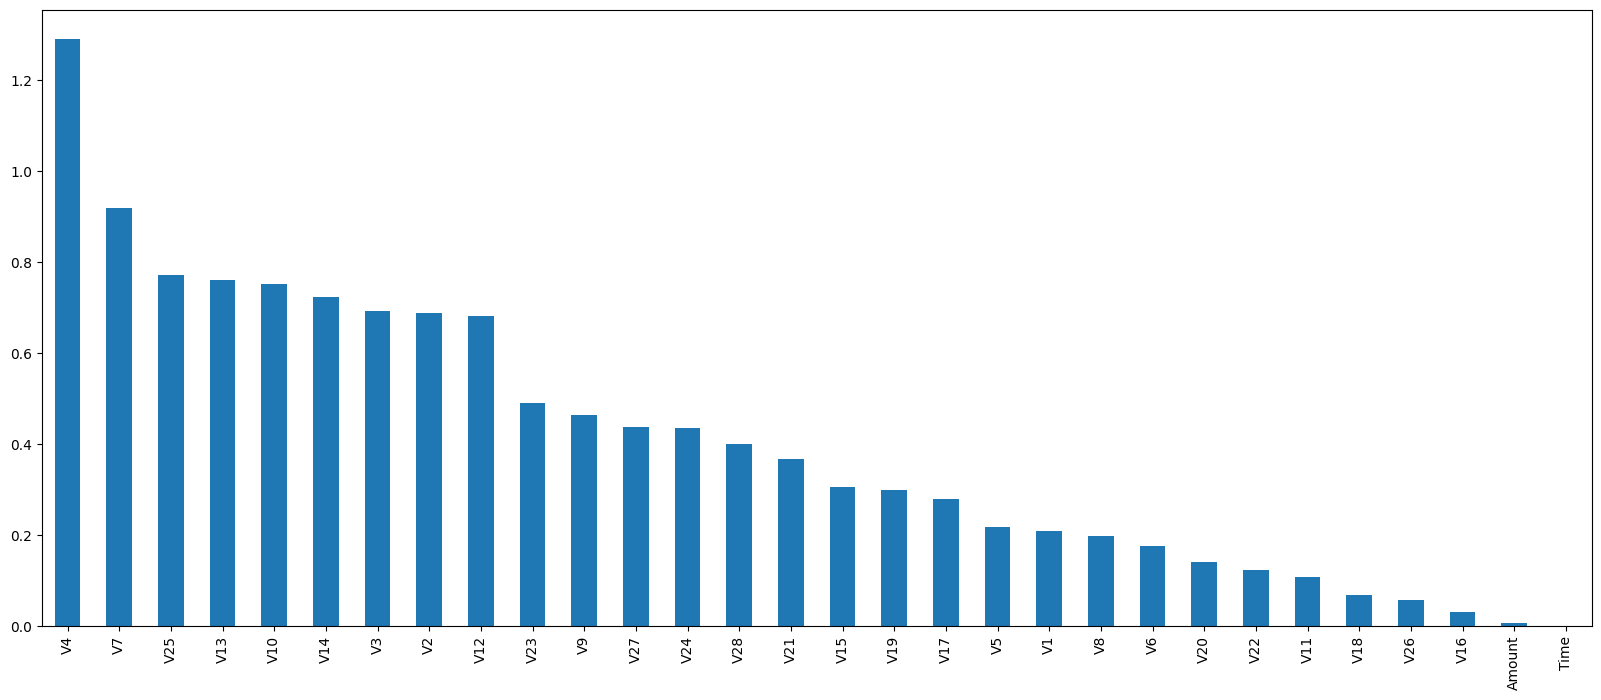

In [78]:
lr.fit(X_train_rs, y_train_rs)

coefficients_rs = lr.coef_[0]

feature_importance_rs = pd.Series(np.abs(coefficients_rs), index =X_train_rs.columns)
feature_importance_rs.sort_values(ascending=False).plot.bar(figsize =(20,8))

#  Selecting KBest for Logistic Regression


In [79]:
k = 28
top_k_features = feature_importance_rs.nlargest(k).index

print(top_k_features)

X_train_selected_rs_1 = X_train_rs[top_k_features]
X_test_selected_rs_1 = X_test_rs[top_k_features]


Index(['V4', 'V7', 'V25', 'V13', 'V10', 'V14', 'V3', 'V2', 'V12', 'V23', 'V9',
       'V27', 'V24', 'V28', 'V21', 'V15', 'V19', 'V17', 'V5', 'V1', 'V8', 'V6',
       'V20', 'V22', 'V11', 'V18', 'V26', 'V16'],
      dtype='object')


In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(lr, lr_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_rs_1, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_rs_1)

# print classification report
print(classification_report(y_test_rs, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{'random_state': 0}
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2482
         1.0       0.93      0.96      0.94       518

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



# **SMOTETomek** 

In [10]:
from imblearn.combine import SMOTETomek
smto = SMOTETomek()
X_smto, y_smto = smto.fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train_smto, X_test_smto, y_train_smto, y_test_smto = train_test_split(X_smto, y_smto, test_size = 0.2, random_state = 40)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(lr, lr_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_smto, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_smto)

# print classification report
print(classification_report(y_test_smto, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{'random_state': 0}
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     11435
         1.0       0.98      0.96      0.97     11311

    accuracy                           0.97     22746
   macro avg       0.97      0.97      0.97     22746
weighted avg       0.97      0.97      0.97     22746



# Feature selection ###

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.30694714 0.29937001 0.42328335 0.4938417  0.51806633 0.25560169
 0.37190824 0.40014853 0.2406255  0.35866505 0.52847113 0.49800152
 0.52309966 0.05035785 0.57915293 0.05679091 0.41937228 0.48031149
 0.29437022 0.14222165 0.1765352  0.33718652 0.03570786 0.10423193
 0.10217618 0.09285513 0.17047364 0.31393083 0.26911119 0.30692448]



<Axes: >

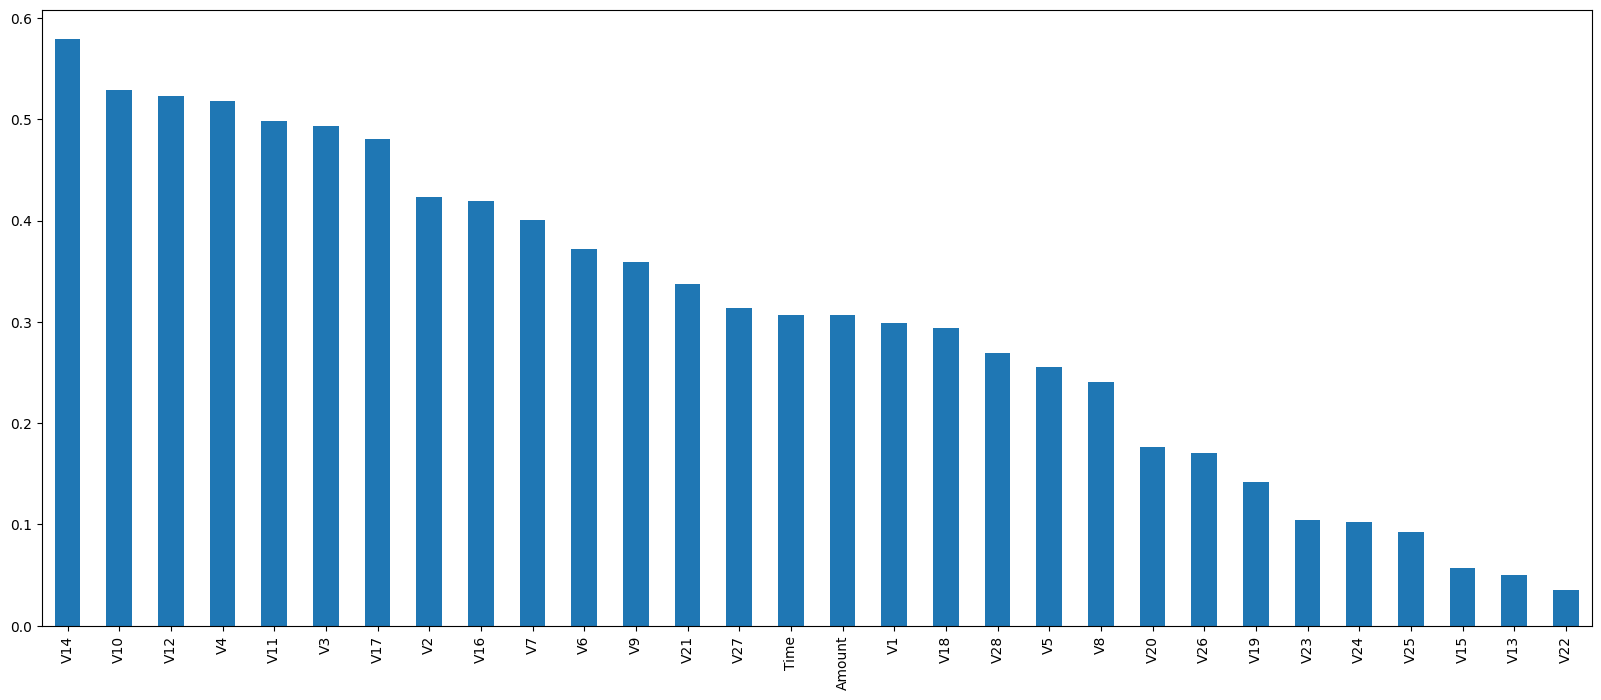

In [18]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_smto = mutual_info_classif(X_train_smto, y_train_smto)
print(m_smto)
print()

m_smto = pd.Series(m_smto)

m_smto.index = X_train_smto.columns
m_smto.sort_values(ascending= False)
m_smto.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting KBest

In [19]:
from sklearn.feature_selection import SelectKBest
k_best = 27
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_smto = mi_selector.fit_transform(X_train_smto, y_train_smto)
X_test_selected_smto = mi_selector.transform(X_test_smto)


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(lr, lr_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smto, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smto)

# print classification report
print(classification_report(y_test_smto, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{'random_state': 0}
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     11435
         1.0       0.98      0.96      0.97     11311

    accuracy                           0.97     22746
   macro avg       0.97      0.97      0.97     22746
weighted avg       0.97      0.97      0.97     22746



# Feature Selection for LogisticRegression

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

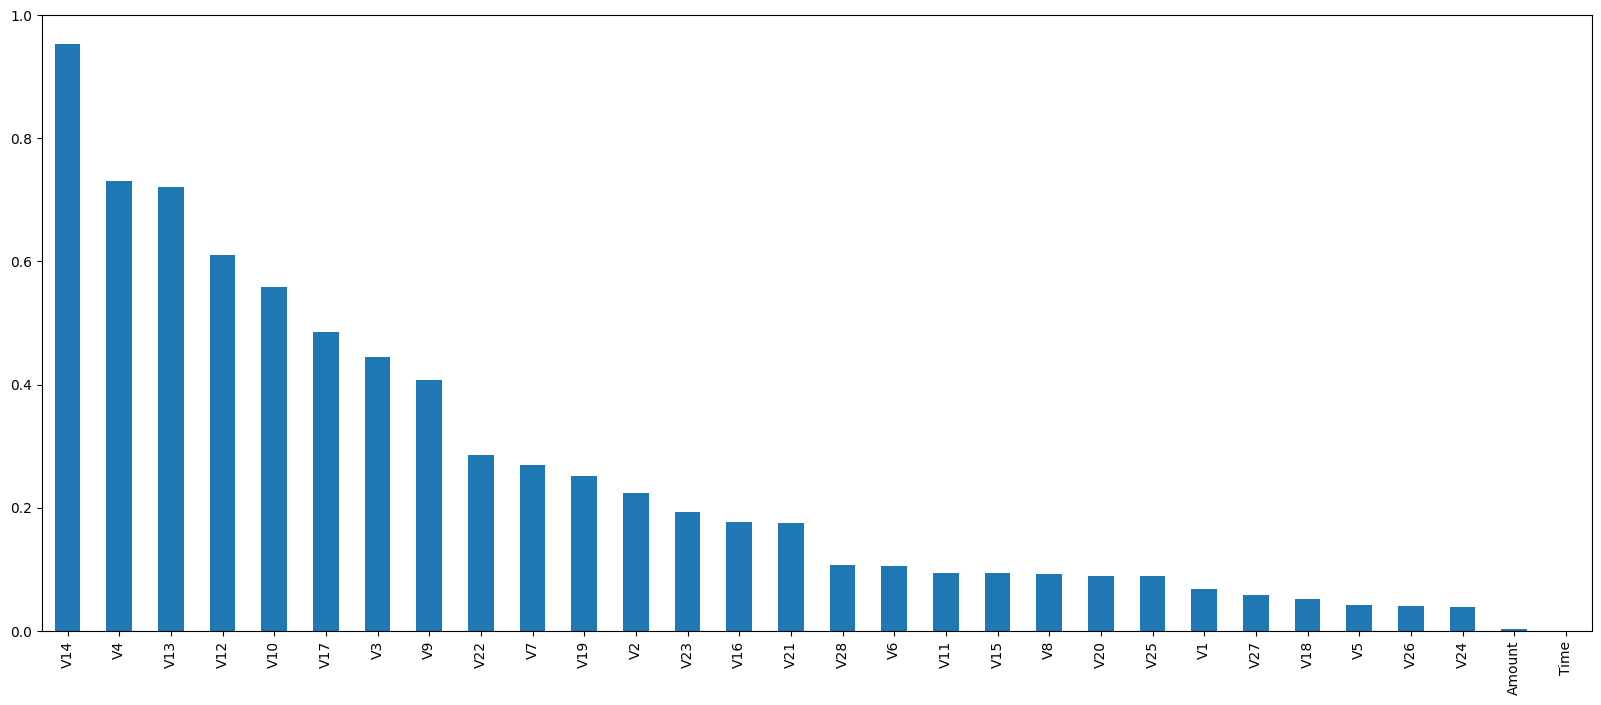

In [11]:
lr.fit(X_train_smto, y_train_smto)

coefficients_smto = lr.coef_[0]

feature_importance_smto = pd.Series(np.abs(coefficients_smto), index =X_train_smto.columns)
feature_importance_smto.sort_values(ascending=False).plot.bar(figsize =(20,8))

# Selecting KBest for Logistic Regression
# **BEST**

In [12]:
k = 28
top_k_features = feature_importance_smto.nlargest(k).index

print(top_k_features)

X_train_selected_smto_1 = X_train_smto[top_k_features]
X_test_selected_smto_1 = X_test_smto[top_k_features]


Index(['V14', 'V4', 'V13', 'V12', 'V10', 'V17', 'V3', 'V9', 'V22', 'V7', 'V19',
       'V2', 'V23', 'V16', 'V21', 'V28', 'V6', 'V11', 'V15', 'V8', 'V20',
       'V25', 'V1', 'V27', 'V18', 'V5', 'V26', 'V24'],
      dtype='object')


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

grid = GridSearchCV(lr, lr_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smto_1, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smto_1)

# print confusion matrix
print(confusion_matrix(y_test_smto, grid_predictions))

# print classification report
print(classification_report(y_test_smto, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{'random_state': 0}
[[11288   113]
 [  363 10977]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     11401
         1.0       0.99      0.97      0.98     11340

    accuracy                           0.98     22741
   macro avg       0.98      0.98      0.98     22741
weighted avg       0.98      0.98      0.98     22741



# **SMOTE + TOMEKLinks**

In [51]:
from imblearn.over_sampling import SMOTE
desired_counts = {0:57000, 1: 5500}
smot = SMOTE(sampling_strategy=desired_counts, random_state=40)
X_smot, y_smot =smot.fit_resample(X, y)

from imblearn.under_sampling import TomekLinks

tomek_links = TomekLinks()
X_smotu, y_smotu = tomek_links.fit_resample(X_smot, y_smot)

from sklearn.model_selection import train_test_split
X_train_smotu, X_test_smotu, y_train_smotu, y_test_smotu = train_test_split(X_smotu, y_smotu, test_size = 0.3, random_state = 40)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(lr, lr_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_smotu, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_smotu)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{'random_state': 0}
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     17016
         1.0       0.89      0.95      0.92      1694

    accuracy                           0.99     18710
   macro avg       0.94      0.97      0.96     18710
weighted avg       0.99      0.99      0.99     18710



# Feature Selection

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.10882973 0.1162004  0.17385205 0.20958557 0.21542547 0.11742366
 0.15946778 0.17571248 0.10819005 0.15998037 0.23189295 0.22323856
 0.2312661  0.01174203 0.25050956 0.01682305 0.18982667 0.21999999
 0.14422164 0.05784564 0.06582582 0.13830833 0.012808   0.04148292
 0.03125758 0.04240343 0.05447078 0.12760939 0.10399311 0.08988109]



<Axes: >

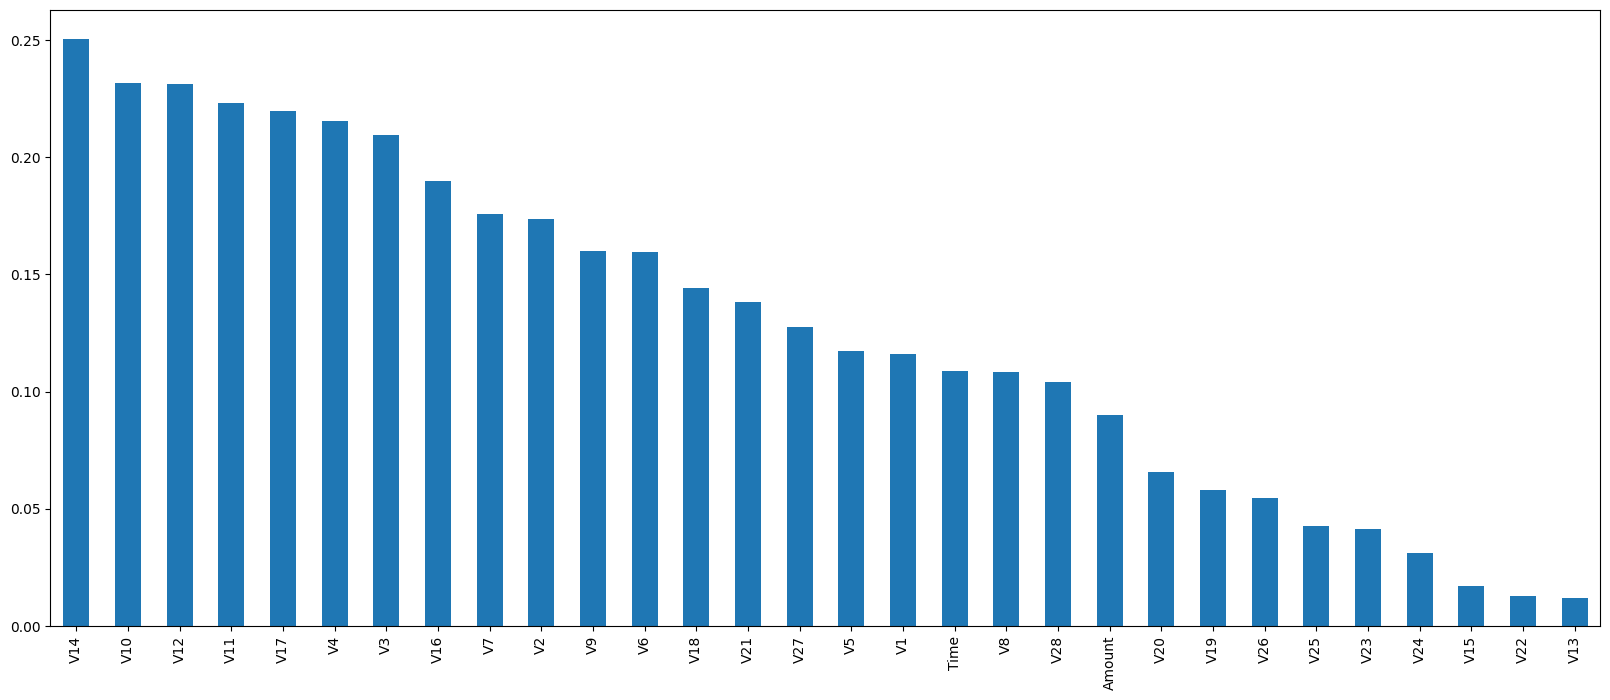

In [53]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_smotu = mutual_info_classif(X_train_smotu, y_train_smotu)
print(m_smotu)
print()

m_smotu = pd.Series(m_smotu)

m_smotu.index = X_train_smotu.columns
m_smotu.sort_values(ascending= False)
m_smotu.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting Kbest

In [54]:
from sklearn.feature_selection import SelectKBest
k_best = 26
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_smotu = mi_selector.fit_transform(X_train_smotu, y_train_smotu)
X_test_selected_smotu = mi_selector.transform(X_test_smotu)


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(lr, lr_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smotu, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smotu)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{'random_state': 0}
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     17016
         1.0       0.90      0.96      0.93      1694

    accuracy                           0.99     18710
   macro avg       0.95      0.97      0.96     18710
weighted avg       0.99      0.99      0.99     18710



# Feature Selection for Logistic Regression

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

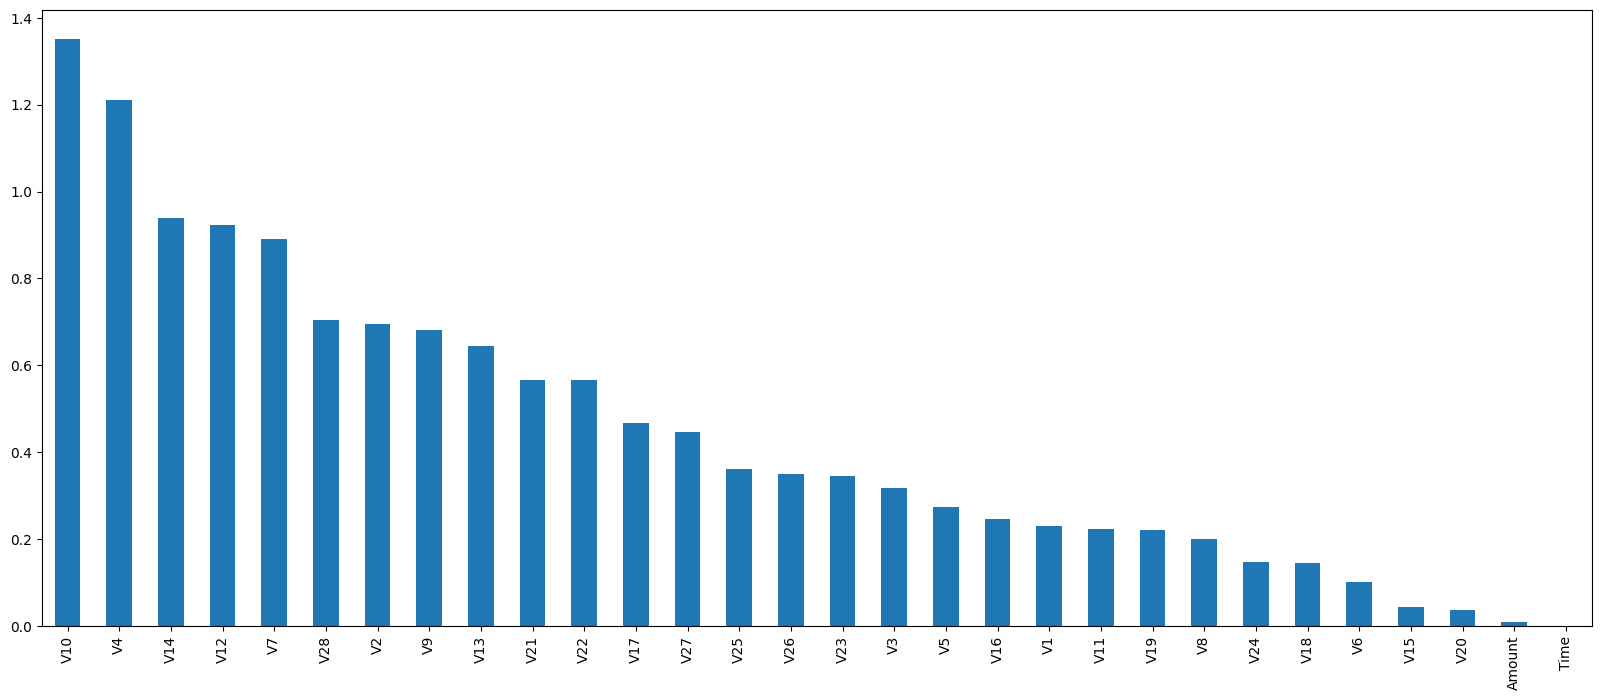

In [80]:
lr.fit(X_train_smotu, y_train_smotu)

coefficients_smotu = lr.coef_[0]

feature_importance_smotu = pd.Series(np.abs(coefficients_smotu), index =X_train_smotu.columns)
feature_importance_smotu.sort_values(ascending=False).plot.bar(figsize =(20,8))

# Selecting KBest for Logistic Regression

In [81]:
k = 28
top_k_features = feature_importance_smto.nlargest(k).index

print(top_k_features)

X_train_selected_smotu_1 = X_train_smotu[top_k_features]
X_test_selected_smotu_1 = X_test_smotu[top_k_features]


Index(['V14', 'V13', 'V4', 'V12', 'V10', 'V3', 'V17', 'V9', 'V7', 'V22', 'V19',
       'V2', 'V23', 'V21', 'V16', 'V6', 'V28', 'V8', 'V20', 'V11', 'V25',
       'V18', 'V1', 'V5', 'V27', 'V15', 'V24', 'V26'],
      dtype='object')


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(lr, lr_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smotu_1, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smotu_1)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{'random_state': 0}
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     17016
         1.0       0.90      0.96      0.93      1694

    accuracy                           0.99     18710
   macro avg       0.95      0.98      0.96     18710
weighted avg       0.99      0.99      0.99     18710

